# $ \text{Т.14} $

$ \text{Пусть } x_n \text{ и } y_m \text{ - независимые случайные выборки} \\ \text{ из нормального распределения с параметрами } a \text{, } \sigma_x^2 = 2 \text{ и } \\ b \text{, } \sigma_y^2 = 1 \text{ соответственно. Используя реализации случайных выборок: } \\ \vec{x} = \begin{pmatrix} -1.11 & -6.10 & 2.42 \end{pmatrix}^T \text{, } \vec{y} = \begin{pmatrix} -2.29 & -2.91 \end{pmatrix}^T \text{,} \\ \text{ проверить гипотезу о равенстве средних против альтернатив } a > b \text{.} $

In [1]:
from rich.console import Console
from rich.panel import Panel
from rich.text import Text

import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator

console = Console()

In [2]:
alpha = 0.05

n = 3
m = 2

x_n = np.array([-1.11, -6.10, 2.42])
y_m = np.array([-2.29, -2.91])

sigma_x = 2
sigma_y = 1

In [3]:
delta = x_n.mean() - y_m.mean()

N = stats.norm(loc=0,
               scale=np.sqrt(sigma_x / n + sigma_y / m))

console.print(Panel(Text(str(delta), style="bold"),
              title="Значение delta"),
              justify="left")

╭── Значение delta ──╮                                                                                             
│ 1.0033333333333334 │                                                                                             
╰────────────────────╯

In [4]:
q = N.ppf(1 - alpha)
console.print(Panel(Text(str(q), style="bold"),
              title="Квантиль порядка 1 - alpha"),
              justify="left")

╭─ Квантиль порядка 1 - alpha ─╮                                                                                   
│ 1.776644973851364            │                                                                                   
╰──────────────────────────────╯

In [5]:
p_value = N.sf(delta)
console.print(Panel(Text(f"p-value: {p_value}",
                         style="bold"),
                    title="p-value"),
              justify="left")

╭────────── p-value ───────────╮                                                                                   
│ p-value: 0.17646885841229104 │                                                                                   
╰──────────────────────────────╯

$ \text{Построить график мощности критерия.} $

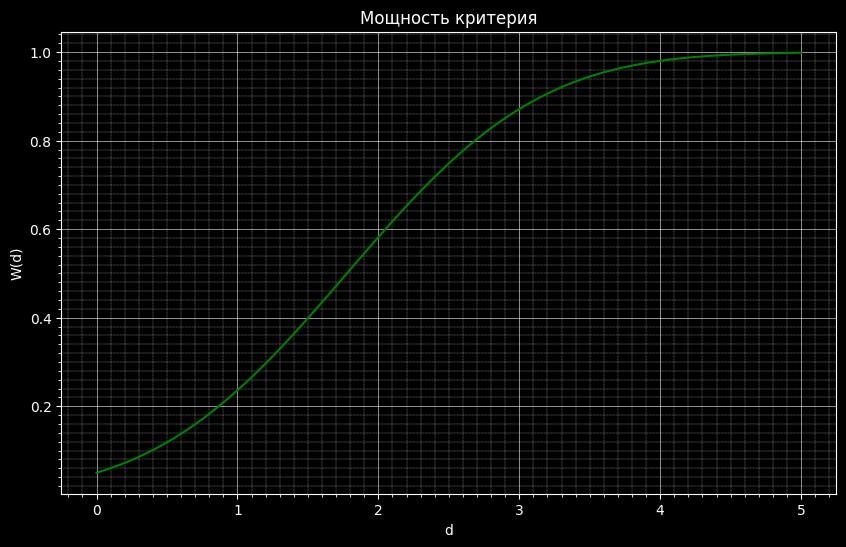

In [6]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Мощность критерия")
axs.set_xlabel("d")
axs.set_ylabel("W(d)")

d = np.linspace(0, 5, 100)

axs.plot(d, N.sf(-d + q),
         label="Мощность критерия",
         color="green")

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

# polt.legend()
polt.show()